In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
import sys,os
import rdkit
import networkx as nx
import pandas as pd

In [4]:
from tqdm import tqdm_notebook

In [5]:
xyzmols={}
suppl = Chem.SDMolSupplier('../input/xyz2mol.sdf',removeHs=False)
for mol in suppl:
    name=mol.GetProp("_Name").replace(".xyz","")
    xyzmols[name]=mol
len(xyzmols)

130760

In [6]:
graphmols={}
suppl = Chem.SDMolSupplier('../input/graph2mol.sdf',removeHs=False)
for mol in suppl:
    name=mol.GetProp("_Name")
    graphmols[name]=mol
len(graphmols)

130775

In [52]:
xyz_missed=set(list(graphmols.keys())).difference(xyzmols.keys())
len(xyz_missed)

15

In [9]:
molnames=sorted(list(set(list(xyzmols.keys())+list(graphmols.keys()))))
len(molnames)

130775

In [8]:
checkstatus={}
for molname in tqdm_notebook(molnames):
    err_msg=""
    if molname not in xyzmols:
        err_msg += " mol not in xyz. "
    if molname not in graphmols:
        err_msg += " mol not in graph. "        
    if not err_msg:
        mol1=xyzmols[molname]
        mol2=graphmols[molname]
        if Chem.MolToSmiles(mol1,isomericSmiles=False)==Chem.MolToSmiles(mol2,isomericSmiles=False):
            pass
        else:
            err_msg = " not equal "
    checkstatus[molname]=err_msg

In [10]:
df=pd.Series(checkstatus).to_frame().reset_index()
df.columns=['molname','msg']
df['has_error']=df['msg'].map(lambda u: u!="")

In [11]:
df.head()

molname msg  has_error
0  dsgdb9nsd_000001          False
1  dsgdb9nsd_000002          False
2  dsgdb9nsd_000003          False
3  dsgdb9nsd_000004          False
4  dsgdb9nsd_000005          False

In [12]:
df.has_error.sum(),df.shape

(3737, (130775, 3))

In [13]:
df.has_error.sum()/df.shape[0]

0.02857579812655324

In [14]:
dferror=df[df['has_error']]

In [15]:
dferror['msg'].map(lambda u: 'mol not in xyz' in u).sum()

15

In [16]:
dferror['msg'].map(lambda u: 'mol not in graph' in u).sum()

0

In [17]:
dferror['msg'].map(lambda u: 'not equal' in u).sum()

3722

In [18]:
dferror=dferror[dferror['msg'].map(lambda u: 'not equal' in u)]

In [19]:
dferror

molname          msg  has_error
192     dsgdb9nsd_000202   not equal        True
194     dsgdb9nsd_000204   not equal        True
196     dsgdb9nsd_000206   not equal        True
198     dsgdb9nsd_000208   not equal        True
200     dsgdb9nsd_000210   not equal        True
201     dsgdb9nsd_000211   not equal        True
259     dsgdb9nsd_000271   not equal        True
269     dsgdb9nsd_000282   not equal        True
708     dsgdb9nsd_000724   not equal        True
715     dsgdb9nsd_000731   not equal        True
717     dsgdb9nsd_000733   not equal        True
741     dsgdb9nsd_000761   not equal        True
743     dsgdb9nsd_000763   not equal        True
761     dsgdb9nsd_000782   not equal        True
818     dsgdb9nsd_000840   not equal        True
820     dsgdb9nsd_000842   not equal        True
821     dsgdb9nsd_000843   not equal        True
832     dsgdb9nsd_000854   not equal        True
833     dsgdb9nsd_000855   not equal        True
876     dsgdb9nsd_000909   not equal        True
877     dsgdb9nsd_000910   not equal        True
878     dsgdb9nsd_000911   not equal        True
879     dsgdb9nsd_000912   not equal        True
934     dsgdb9nsd_000968   not equal        True
940     dsgdb9nsd_000974   not equal        True
948     dsgdb9nsd_000982   not equal        True
970     dsgdb9nsd_001005   not equal        True
971     dsgdb9nsd_001006   not equal        True
972     dsgdb9nsd_001007   not equal        True
973     dsgdb9nsd_001008   not equal        True
...                  ...          ...        ...
129974  dsgdb9nsd_132959   not equal        True
129982  dsgdb9nsd_132970   not equal        True
129983  dsgdb9nsd_132972   not equal        True
129985  dsgdb9nsd_132974   not equal        True
129988  dsgdb9nsd_132978   not equal        True
130130  dsgdb9nsd_133139   not equal        True
130132  dsgdb9nsd_133141   not equal        True
130135  dsgdb9nsd_133145   not equal        True
130137  dsgdb9nsd_133147   not equal        True
130186  dsgdb9nsd_133208   not equal        True
130215  dsgdb9nsd_133240   not equal        True
130225  dsgdb9nsd_133254   not equal        True
130227  dsgdb9nsd_133257   not equal        True
130228  dsgdb9nsd_133258   not equal        True
130229  dsgdb9nsd_133259   not equal        True
130230  dsgdb9nsd_133261   not equal        True
130245  dsgdb9nsd_133285   not equal        True
130254  dsgdb9nsd_133295   not equal        True
130266  dsgdb9nsd_133307   not equal        True
130268  dsgdb9nsd_133309   not equal        True
130271  dsgdb9nsd_133313   not equal        True
130273  dsgdb9nsd_133315   not equal        True
130331  dsgdb9nsd_133383   not equal        True
130333  dsgdb9nsd_133385   not equal        True
130346  dsgdb9nsd_133401   not equal        True
130398  dsgdb9nsd_133464   not equal        True
130400  dsgdb9nsd_133466   not equal        True
130405  dsgdb9nsd_133471   not equal        True
130407  dsgdb9nsd_133473   not equal        True
130755  dsgdb9nsd_133863   not equal        True

[3722 rows x 3 columns]

In [20]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [21]:
import re
lst=[]
for molname in dferror['molname']:
    mol1=xyzmols[molname]
    mol2=graphmols[molname]
    a,b=rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol1),\
           rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol2)
    lst.append(
        (molname,mol1.GetNumAtoms(),mol2.GetNumAtoms(),
          a,b, 
          np.array(re.findall(r'\d+', a)).astype(np.int).sum(),
          np.array(re.findall(r'\d+', b)).astype(np.int).sum()
         )
              )
    #break

In [22]:
df2=pd.DataFrame(lst, columns=['molname','atom1','atom2','f1','f2','n1','n2'])

In [23]:
df2.shape

(3722, 7)

In [24]:
(df2['atom1']==df2['atom2']).sum(),(df2['atom1']==df2['n1']).sum(),(df2['atom2']==df2['n2']).sum(),\
((df2['atom2']==df2['n1']) & (df2['atom2']==df2['n2'])).sum()

(3722, 1476, 347, 2)

In [27]:
len(xyzmols), len(graphmols)

(130760, 130775)

# merge

In [28]:
mergedmols=dict(xyzmols)

In [31]:
print (len(mergedmols))
print ( "15 are missing and 3 has problems")

130760
15 are missing and 3 has problems


In [32]:
xyzbads = ['dsgdb9nsd_038230','dsgdb9nsd_059827','dsgdb9nsd_133863']
for molname in xyzbads:
    del mergedmols[molname]

In [34]:
print ( str(len(mergedmols)) + " mols left")

130757 mols left


In [38]:
graph_check_status = pd.read_csv("../input/graphcheck.status.csv")
graph_check_status=graph_check_status[graph_check_status['has_error']]

/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
graph_check_status.shape

(2673, 5)

In [43]:
bad_graph_mols1=set(graph_check_status['molname'])
print (len(bad_graph_mols1))

209


In [46]:
good_graph_mols = list(df2[(df2['atom2']==df2['n2'])]['molname'])
good_graph_mols = [ u for u in good_graph_mols if not u in bad_graph_mols1]
print ("merge {} from graph mols".format(len(good_graph_mols)))

merge 334 from graph mols


In [48]:
for u in good_graph_mols:
    assert u not in bad_graph_mols1
    mergedmols[u] = graphmols[u]

In [49]:
print ( str(len(mergedmols)) + " mols left")

130758 mols left


In [66]:
for u in xyz_missed:
    print (u, u in mergedmols, u in bad_graph_mols1)

dsgdb9nsd_042681 False False
dsgdb9nsd_037494 False False
dsgdb9nsd_090838 False False
dsgdb9nsd_044308 False False
dsgdb9nsd_073323 False False
dsgdb9nsd_048903 False False
dsgdb9nsd_107870 False False
dsgdb9nsd_042676 False False
dsgdb9nsd_090191 False False
dsgdb9nsd_067109 False False
dsgdb9nsd_066495 False False
dsgdb9nsd_133831 False False
dsgdb9nsd_037900 False False
dsgdb9nsd_044322 False False
dsgdb9nsd_017732 False False


In [58]:
for u in xyzbads:
    print (u, u in mergedmols, u in bad_graph_mols1, u in xyz_missed)

dsgdb9nsd_038230 False False False
dsgdb9nsd_059827 False True False
dsgdb9nsd_133863 True False False


In [56]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

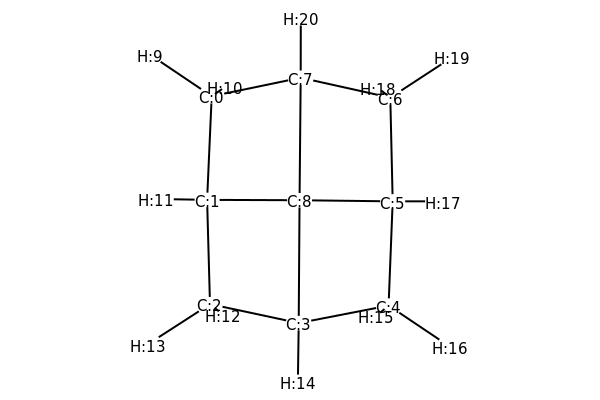

In [57]:
for u in xyzbads:
    if u in mergedmols:
        display(mol_with_atom_index(mergedmols[u]))

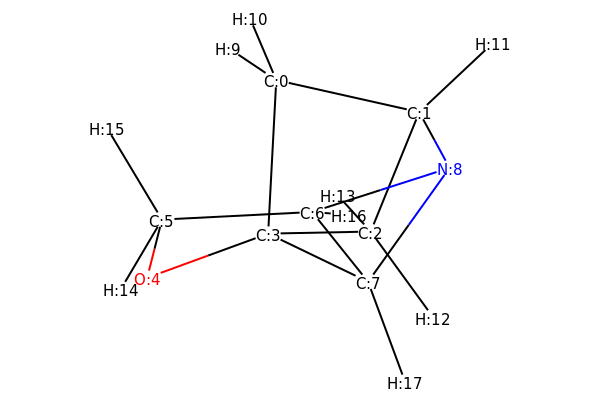

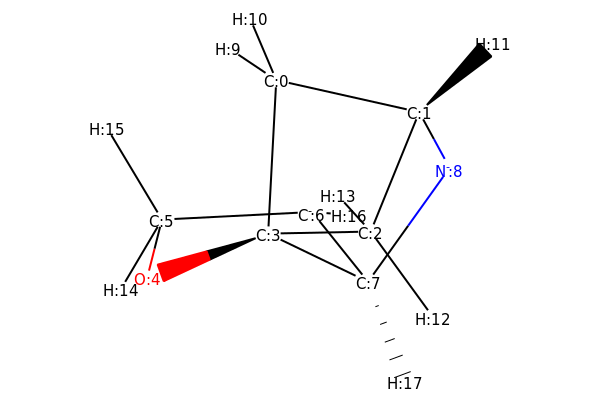

In [61]:
display(mol_with_atom_index(graphmols['dsgdb9nsd_038230']))
display(mol_with_atom_index(xyzmols['dsgdb9nsd_038230']))

In [63]:
print ("use graph mol for dsgdb9nsd_038230")
mergedmols['dsgdb9nsd_038230']=graphmols['dsgdb9nsd_038230']

use graph mol for dsgdb9nsd_038230


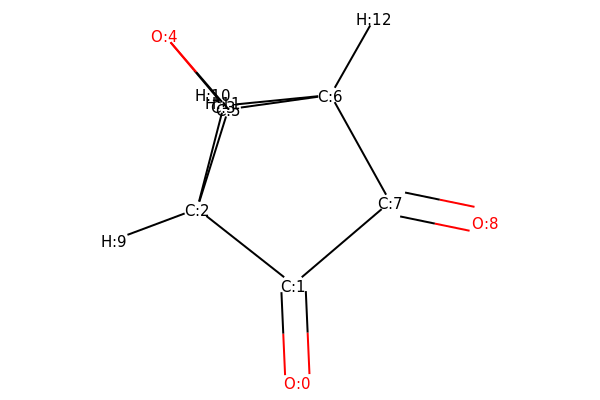

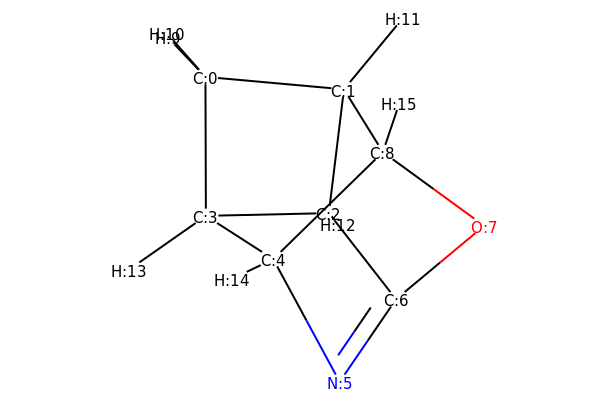

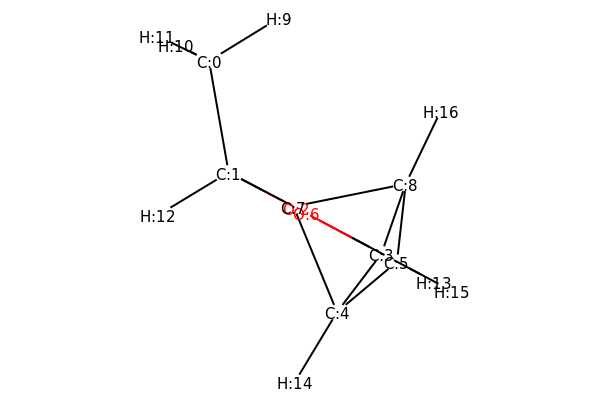

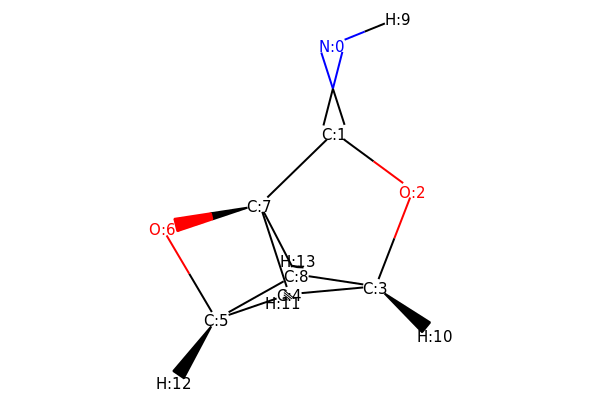

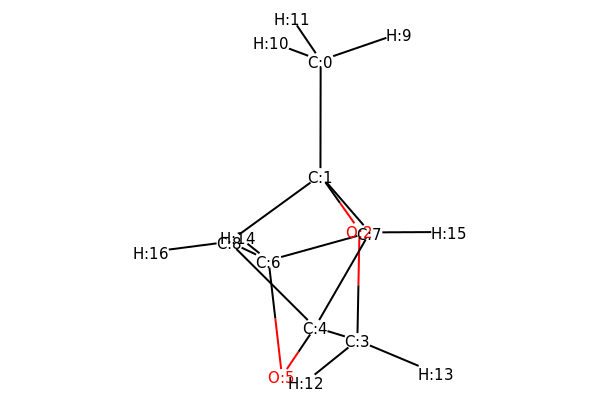

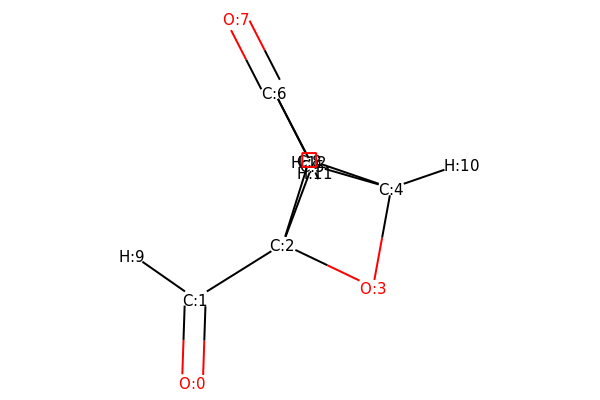

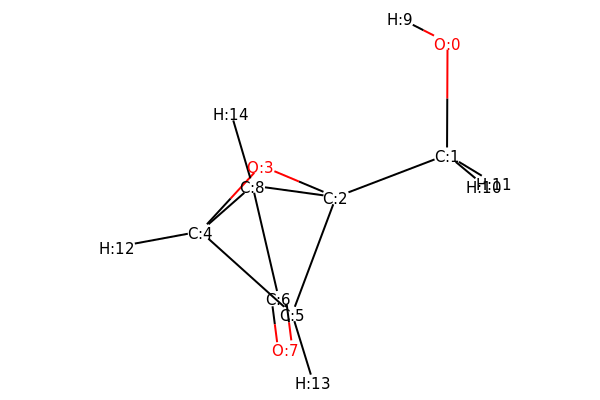

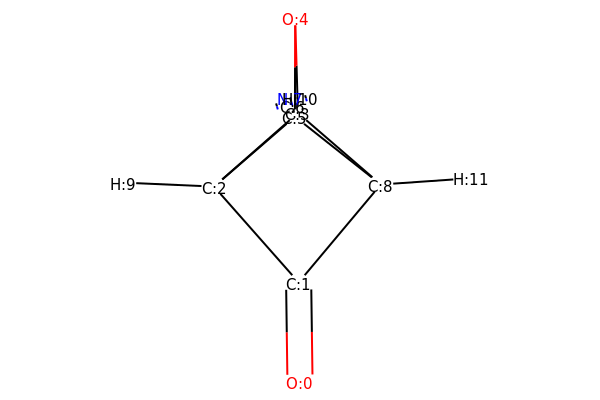

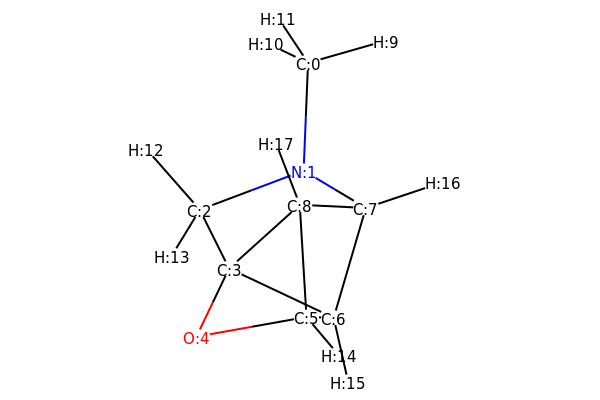

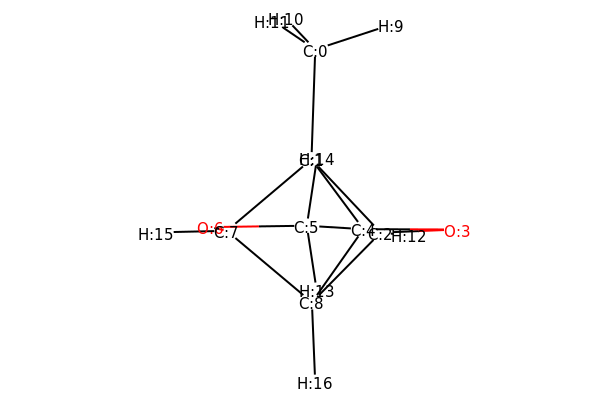

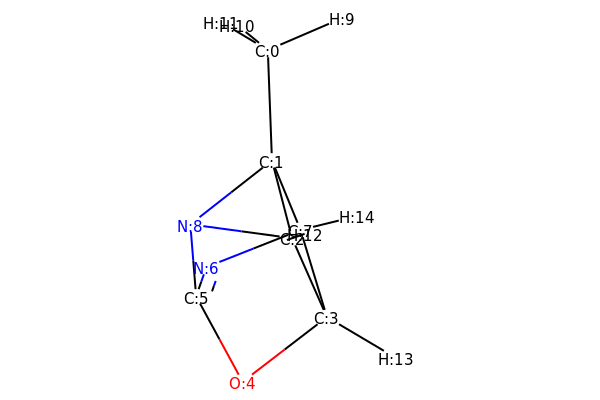

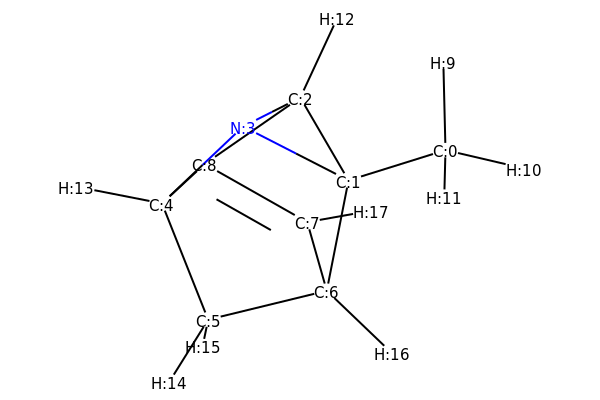

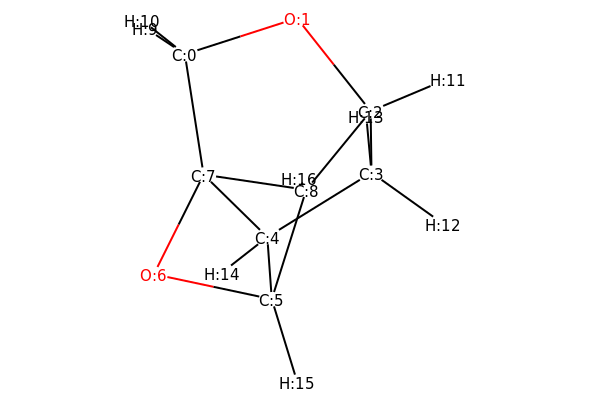

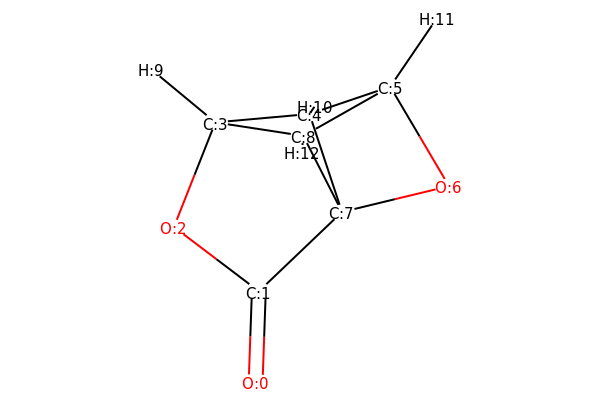

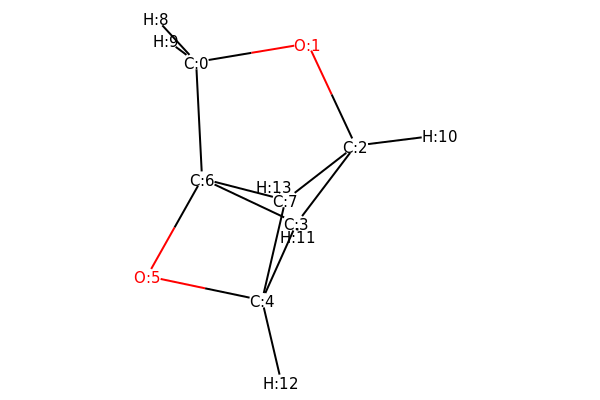

In [64]:
for u in xyz_missed:
    display(mol_with_atom_index(graphmols[u]))

In [67]:
print ("use graph mols for xyz missing")
for u in xyz_missed:
    assert u not in xyzmols
    assert u  in graphmols
    assert u not in bad_graph_mols1
    mergedmols[u]=graphmols[u]

use graph mols for xyz missing


In [69]:
print (  "{} mols left,  total {}".format(len(mergedmols), len(molnames)))

130774 mols left,  total 130775


In [70]:
print ("dsgdb9nsd_059827 is not correct in both bonds, ignore it")
assert 'dsgdb9nsd_059827' not in mergedmols
set(molnames).difference(mergedmols.keys())

dsgdb9nsd_059827 is not correct in both bonds, ignore it


{'dsgdb9nsd_059827'}

In [71]:
outfilename="../input/merged_mols.sdf"
writer = Chem.SDWriter(outfilename)
for molecule_name in mergedmols:
    mol = mergedmols[molecule_name]
    writer.write(mol)
writer.close()    